In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# Once mounted, provide the full path to your file in Google Drive
file_path = 'https://raw.githubusercontent.com/AS2357/ML-project/refs/heads/main/data/ADA%20Final%20Project.xlsx%20-%20Sheet1.csv?token=GHSAT0AAAAAACVJDK6YNWDJALECVS2AV7XYZYPMOQQ'
df = pd.read_csv(file_path)
df.tail()

,time,cash_rate_target,inflation_rate,CPI,unemployment_rate,hourly_wage_growth,Bank_Prime_Loan_rate,labor_market_condition_index,USD-AUD_exchange_rate,deposit&foreign_related_institution,...,Trade_balance,Producer_Price_Index_by_Commodity,Business_Investment_And_Sentiment,employment-to-population_ratio,Interaction_exchange_rate_and_share_price,Export_Price_Index,coal_price,Oil_Price_in_Europe (in USD),Interation_exchange_rate_and_oil_price,lending_to_government _in_billion
301,2024-04-01,4.35,2.342961,313.207,9.9,6.5,8.5,0.56975,0.6507,1317.5127,...,-74902,256.978,0.00000,60.2,229.546033,NaN,137.495357,88.974545,136.736661,367.1
302,2024-05-01,4.35,2.451501,313.225,9.5,4.9,8.5,0.58064,0.6626,1337.9833,...,-75306,255.453,0.00000,60.1,234.406571,NaN,148.006071,83.053913,125.345477,360.5
303,2024-06-01,4.35,2.367064,313.049,8.9,4.7,8.5,0.49924,0.6642,1319.2934,...,-73016,256.015,0.00000,60.1,235.636799,NaN,143.509286,82.917500,124.838151,373.0
304,2024-07-01,4.35,2.368186,313.534,9.4,4.5,8.5,0.52502,0.6673,1297.3476,...,-78791,257.485,0.00000,60.0,237.403880,NaN,141.994286,84.048696,125.953388,379.5
305,2024-08-01,4.35,2.164069,314.121,NaN,4.7,8.5,0.53366,0.6658,1311.1670,...,-77865,255.613,0.32292,60.0,237.536028,NaN,154.200000,79.018636,118.682242,394.8


In [ ]:
# Assuming 'unemployment_rate' is one of the columns in your DataFrame

# Calculate the mean of the last 5 rows (excluding the last row)
mean_last_5_rows = df['unemployment_rate'].iloc[-6:-1].mean()

# Replace the last row of 'unemployment_rate' with this mean
df.loc[df.index[-1], 'unemployment_rate'] = mean_last_5_rows

# Display the updated DataFrame to verify the change
print(df[['unemployment_rate']].tail())

     unemployment_rate
301               9.90
302               9.50
303               8.90
304               9.40
305               9.64


In [ ]:
# Check the last few rows of 'Export_Price_Index'
export_price_index_tail = df_with_lags[['Export_Price_Index']].tail()
print(export_price_index_tail)

     Export_Price_Index
301                 0.0
302                 0.0
303                 0.0
304                 0.0
305                 0.0


In [ ]:
df.tail()

,time,cash_rate_target,inflation_rate,CPI,unemployment_rate,hourly_wage_growth,Bank_Prime_Loan_rate,labor_market_condition_index,USD-AUD_exchange_rate,deposit&foreign_related_institution,...,Trade_balance,Producer_Price_Index_by_Commodity,Business_Investment_And_Sentiment,employment-to-population_ratio,Interaction_exchange_rate_and_share_price,Export_Price_Index,coal_price,Oil_Price_in_Europe (in USD),Interation_exchange_rate_and_oil_price,lending_to_government _in_billion
301,2024-04-01,4.35,2.342961,313.207,9.90,6.5,8.5,0.56975,0.6507,1317.5127,...,-74902,256.978,0.00000,60.2,229.546033,NaN,137.495357,88.974545,136.736661,367.1
302,2024-05-01,4.35,2.451501,313.225,9.50,4.9,8.5,0.58064,0.6626,1337.9833,...,-75306,255.453,0.00000,60.1,234.406571,NaN,148.006071,83.053913,125.345477,360.5
303,2024-06-01,4.35,2.367064,313.049,8.90,4.7,8.5,0.49924,0.6642,1319.2934,...,-73016,256.015,0.00000,60.1,235.636799,NaN,143.509286,82.917500,124.838151,373.0
304,2024-07-01,4.35,2.368186,313.534,9.40,4.5,8.5,0.52502,0.6673,1297.3476,...,-78791,257.485,0.00000,60.0,237.403880,NaN,141.994286,84.048696,125.953388,379.5
305,2024-08-01,4.35,2.164069,314.121,9.64,4.7,8.5,0.53366,0.6658,1311.1670,...,-77865,255.613,0.32292,60.0,237.536028,NaN,154.200000,79.018636,118.682241,394.8


In [ ]:
import pandas as pd

# Function to create lag features
def create_lag_features(df, columns=['cash_rate_target', 'inflation_rate'], lags=5):
    """
    Create lag features for the specified columns in the DataFrame.
    """
    for col in columns:
        for lag in range(1, lags + 1):
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return df

# Step 1: Apply lagging to 'cash_rate_target' and 'inflation_rate'
lags = 5  # Set the number of lag periods
df_with_lags = create_lag_features(df, columns=['cash_rate_target', 'inflation_rate'], lags=lags)

# Step 2: Instead of dropping NaNs, fill them with 0 or column means
df_with_lags.fillna(0, inplace=True)  # You can also use `df_with_lags.fillna(df_with_lags.mean(), inplace=True)`

# Display the data to ensure both original and lagged values are present
print(df_with_lags.head(10))  # This should include the 1999-03-01 data and lag features


        time  cash_rate_target  inflation_rate    CPI  unemployment_rate  \
0 1999-03-01              4.75        2.789154  164.8               14.4   
1 1999-04-01              4.75        2.796338  165.9               13.4   
2 1999-05-01              4.75        2.849033  166.0               13.3   
3 1999-06-01              4.75        2.937107  166.0               12.2   
4 1999-07-01              4.75        3.010550  166.7               11.4   
5 1999-08-01              4.75        3.055712  167.1               13.0   
6 1999-09-01              4.75        3.093912  167.8               13.4   
7 1999-10-01              4.75        3.134861  168.1               11.8   
8 1999-11-01              4.98        3.149233  168.4               11.6   
9 1999-12-01              5.00        3.217364  168.8               13.1   

   hourly_wage_growth  Bank_Prime_Loan_rate   labor_market_condition_index  \
0                 5.7                  7.75                        1.21878   
1      

In [ ]:
df_with_lags

,time,cash_rate_target,inflation_rate,CPI,unemployment_rate,hourly_wage_growth,Bank_Prime_Loan_rate,labor_market_condition_index,USD-AUD_exchange_rate,deposit&foreign_related_institution,...,cash_rate_target_lag_1,cash_rate_target_lag_2,cash_rate_target_lag_3,cash_rate_target_lag_4,cash_rate_target_lag_5,inflation_rate_lag_1,inflation_rate_lag_2,inflation_rate_lag_3,inflation_rate_lag_4,inflation_rate_lag_5
0,1999-03-01,4.75,2.789154,164.800,14.40,5.7,7.75,1.21878,0.6308,315.3166,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,1999-04-01,4.75,2.796338,165.900,13.40,4.8,7.75,1.14998,0.6420,313.3005,...,4.75,0.00,0.00,0.00,0.00,2.789154,0.000000,0.000000,0.000000,0.000000
2,1999-05-01,4.75,2.849033,166.000,13.30,5.1,7.75,1.07600,0.6628,310.5651,...,4.75,4.75,0.00,0.00,0.00,2.796338,2.789154,0.000000,0.000000,0.000000
3,1999-06-01,4.75,2.937107,166.000,12.20,4.8,7.75,1.20106,0.6563,307.9128,...,4.75,4.75,4.75,0.00,0.00,2.849033,2.796338,2.789154,0.000000,0.000000
4,1999-07-01,4.75,3.010550,166.700,11.40,5.0,8.00,1.14289,0.6562,311.6175,...,4.75,4.75,4.75,4.75,0.00,2.937107,2.849033,2.796338,2.789154,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2024-04-01,4.35,2.342961,313.207,9.90,6.5,8.50,0.56975,0.6507,1317.5127,...,4.35,4.35,4.35,4.35,4.29,2.218753,2.146201,2.164507,2.278410,2.384114
302,2024-05-01,4.35,2.451501,313.225,9.50,4.9,8.50,0.58064,0.6626,1337.9833,...,4.35,4.35,4.35,4.35,4.35,2.342961,2.218753,2.146201,2.164507,2.278410
303,2024-06-01,4.35,2.367064,313.049,8.90,4.7,8.50,0.49924,0.6642,1319.2934,...,4.35,4.35,4.35,4.35,4.35,2.451501,2.342961,2.218753,2.146201,2.164507
304,2024-07-01,4.35,2.368186,313.534,9.40,4.5,8.50,0.52502,0.6673,1297.3476,...,4.35,4.35,4.35,4.35,4.35,2.367064,2.451501,2.342961,2.218753,2.146201


In [ ]:
df

,time,cash_rate_target,inflation_rate,CPI,unemployment_rate,hourly_wage_growth,Bank_Prime_Loan_rate,labor_market_condition_index,USD-AUD_exchange_rate,deposit&foreign_related_institution,...,cash_rate_target_lag_1,cash_rate_target_lag_2,cash_rate_target_lag_3,cash_rate_target_lag_4,cash_rate_target_lag_5,inflation_rate_lag_1,inflation_rate_lag_2,inflation_rate_lag_3,inflation_rate_lag_4,inflation_rate_lag_5
0,1999-03-01,4.75,2.789154,164.800,14.40,5.7,7.75,1.21878,0.6308,315.3166,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,1999-04-01,4.75,2.796338,165.900,13.40,4.8,7.75,1.14998,0.6420,313.3005,...,4.75,0.00,0.00,0.00,0.00,2.789154,0.000000,0.000000,0.000000,0.000000
2,1999-05-01,4.75,2.849033,166.000,13.30,5.1,7.75,1.07600,0.6628,310.5651,...,4.75,4.75,0.00,0.00,0.00,2.796338,2.789154,0.000000,0.000000,0.000000
3,1999-06-01,4.75,2.937107,166.000,12.20,4.8,7.75,1.20106,0.6563,307.9128,...,4.75,4.75,4.75,0.00,0.00,2.849033,2.796338,2.789154,0.000000,0.000000
4,1999-07-01,4.75,3.010550,166.700,11.40,5.0,8.00,1.14289,0.6562,311.6175,...,4.75,4.75,4.75,4.75,0.00,2.937107,2.849033,2.796338,2.789154,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2024-04-01,4.35,2.342961,313.207,9.90,6.5,8.50,0.56975,0.6507,1317.5127,...,4.35,4.35,4.35,4.35,4.29,2.218753,2.146201,2.164507,2.278410,2.384114
302,2024-05-01,4.35,2.451501,313.225,9.50,4.9,8.50,0.58064,0.6626,1337.9833,...,4.35,4.35,4.35,4.35,4.35,2.342961,2.218753,2.146201,2.164507,2.278410
303,2024-06-01,4.35,2.367064,313.049,8.90,4.7,8.50,0.49924,0.6642,1319.2934,...,4.35,4.35,4.35,4.35,4.35,2.451501,2.342961,2.218753,2.146201,2.164507
304,2024-07-01,4.35,2.368186,313.534,9.40,4.5,8.50,0.52502,0.6673,1297.3476,...,4.35,4.35,4.35,4.35,4.35,2.367064,2.451501,2.342961,2.218753,2.146201


In [ ]:
# Step 2: Create a target column 'cash_rate_change' with "Increase", "Drop", or "Unchanged"
def classify_change(current, previous):
    if pd.isnull(previous):  # No previous value for the first entry
        return "Unchanged"
    elif current > previous:
        return "Increase"
    elif current < previous:
        return "Drop"
    else:
        return "Unchanged"

# Shift the 'cash_rate_target' column to create a 'previous_cash_rate' column for comparison
df['previous_cash_rate'] = df['cash_rate_target'].shift(1)

# Apply the classification function
df['cash_rate_change'] = df.apply(lambda row: classify_change(row['cash_rate_target'], row['previous_cash_rate']), axis=1)

# Drop the 'previous_cash_rate' column (no longer needed)
df.drop(columns=['previous_cash_rate'], inplace=True)

# Display the first few rows with the new classification
df[['time', 'cash_rate_target', 'cash_rate_change']].head(20)

,time,cash_rate_target,cash_rate_change
0,1999-03-01,4.75,Unchanged
1,1999-04-01,4.75,Unchanged
2,1999-05-01,4.75,Unchanged
3,1999-06-01,4.75,Unchanged
4,1999-07-01,4.75,Unchanged
5,1999-08-01,4.75,Unchanged
6,1999-09-01,4.75,Unchanged
7,1999-10-01,4.75,Unchanged
8,1999-11-01,4.98,Increase
9,1999-12-01,5.00,Increase


In [ ]:
# Step 3: Preprocess the data: Train a Random Forest Classifier
# Drop columns that are not features (like 'time', 'cash_rate_target', 'cash_rate_change')
X = df.drop(columns=['time', 'cash_rate_target', 'cash_rate_change'])

# Encode the target variable 'cash_rate_change' into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cash_rate_change'])

# Step 4: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Step 5: Handle missing values (NaN) by transforming them into zeros
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Fill NaNs with zeros

# Impute missing values in the training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 6: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

# Step 7: Make predictions on the test dataset
y_pred = rf_classifier.predict(X_test_imputed)
y_pred
# 0: Drop, 1: Unchanged, 2: Increase

array([2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2])

In [ ]:
# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output the accuracy and classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_rep)

Accuracy: 83.87%
              precision    recall  f1-score   support

        Drop       0.70      0.70      0.70        10
    Increase       0.83      0.83      0.83        12
   Unchanged       0.88      0.88      0.88        40

    accuracy                           0.84        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.84      0.84      0.84        62



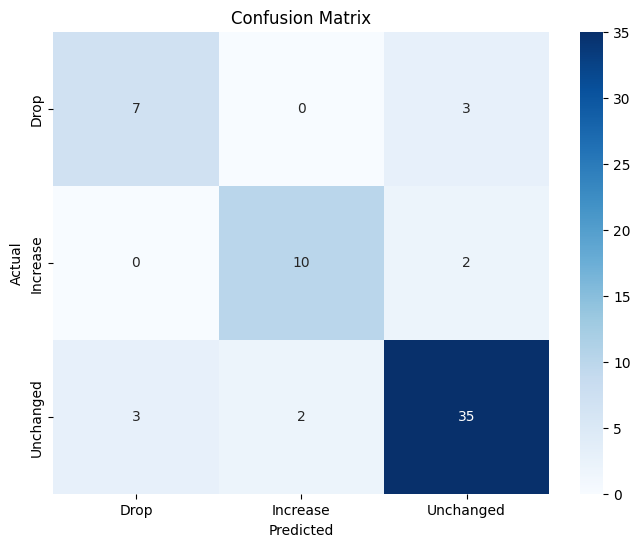

In [ ]:
# confusion matrix
# Define class names using the label encoder
class_names = label_encoder.classes_

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming 'latest_row_data' contains the most recent row of data
latest_row_data = df.iloc[-1:].copy()

# Drop the 'cash_rate_target', 'time', and 'cash_rate_change' columns as they are not features
latest_row_data = latest_row_data.drop(columns=['cash_rate_target', 'time', 'cash_rate_change'])

# Handle missing values in the new data (if any)
latest_row_data_imputed = imputer.transform(latest_row_data)  # Use the same imputer object used during training

# Predict the class (Increase, Drop, Unchanged) for the new row
latest_prediction = rf_classifier.predict(latest_row_data_imputed)

# Decode the numerical prediction back to the original class labels
latest_class_label = label_encoder.inverse_transform(latest_prediction)

# Display the prediction result
print(f"Predicted cash rate change: {latest_class_label[0]}")

Predicted cash rate change: Unchanged


In [ ]:
latest_row_data

,inflation_rate,CPI,unemployment_rate,hourly_wage_growth,Bank_Prime_Loan_rate,labor_market_condition_index,USD-AUD_exchange_rate,deposit&foreign_related_institution,M2,Financial_Market: Share_Prices,...,cash_rate_target_lag_1,cash_rate_target_lag_2,cash_rate_target_lag_3,cash_rate_target_lag_4,cash_rate_target_lag_5,inflation_rate_lag_1,inflation_rate_lag_2,inflation_rate_lag_3,inflation_rate_lag_4,inflation_rate_lag_5
305,2.164069,314.121,9.64,4.7,8.5,0.53366,0.6658,1311.167,20900.2,356.76784,...,4.35,4.35,4.35,4.35,4.35,2.368186,2.367064,2.451501,2.342961,2.218753


In [ ]:
# Filter the DataFrame to only show the lagged columns for 'cash_rate_target'
lagged_cash_rate_columns = [col for col in df.columns if 'cash_rate_target_lag' in col]

# Display the lagged cash rate columns
df_with_lags[lagged_cash_rate_columns].head()

,cash_rate_target_lag_1,cash_rate_target_lag_2,cash_rate_target_lag_3,cash_rate_target_lag_4,cash_rate_target_lag_5
0,0.00,0.00,0.00,0.00,0.0
1,4.75,0.00,0.00,0.00,0.0
2,4.75,4.75,0.00,0.00,0.0
3,4.75,4.75,4.75,0.00,0.0
4,4.75,4.75,4.75,4.75,0.0
